# Single Feature Contribution Train Test 

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from deepchecks.checks.methodology import *
from deepchecks.base import Dataset

## Generating data:

In [2]:
df = pd.DataFrame(np.random.randn(100, 3), columns=['x1', 'x2', 'x3'])
df['x4'] = df['x1'] * 0.5 + df['x2']
df['label'] = df['x2'] + 0.1 * df['x1']
df['x5'] = df['label'].apply(lambda x: 'v1' if x < 0 else 'v2')
ds = Dataset(df, label_name='label')

df_test = df.copy()
df_test['x2'] = df['x2'] + 0.5 * df['x1']
df_test['x3'] = 0.3 * df['x3'] + df['label']
ds_test = Dataset(df_test, label_name='label')

## Running single_feature_contribution_train_validation check:

Single Feature Contribution Train-Test

Return the difference in PPS (Predictive Power Score) of all features between train and test datasets.

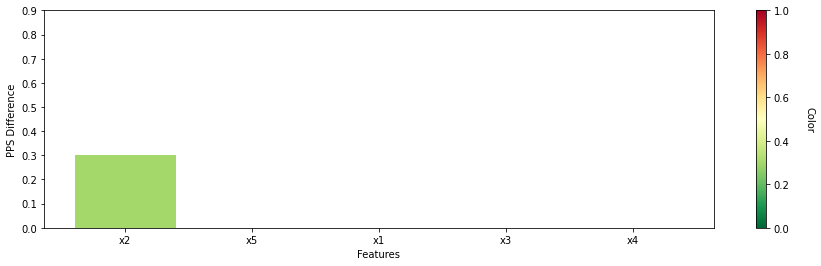

The PPS represents the ability of a feature to single-handedly predict another feature or label.

A high PPS (close to 1) can mean that this feature's success in predicting the label is actually due to data

leakage - meaning that the feature holds information that is based on the label to begin with.

When we compare train PPS to test PPS, A high difference can strongly indicate leakage, as a feature

that was powerful in train but not in test can be explained by leakage in train that is not relevant to a new dataset.

In [3]:
SingleFeatureContributionTrainTest().run(train_dataset=ds, test_dataset=ds_test)

## Using the SingleFeatureContributionTrainTest check class:

Single Feature Contribution Train-Test

Return the difference in PPS (Predictive Power Score) of all features between train and test datasets.

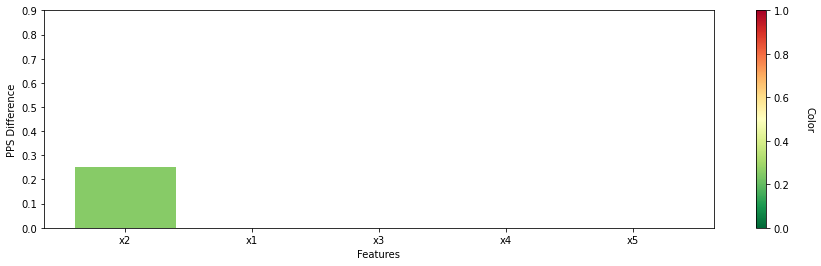

The PPS represents the ability of a feature to single-handedly predict another feature or label.

A high PPS (close to 1) can mean that this feature's success in predicting the label is actually due to data

leakage - meaning that the feature holds information that is based on the label to begin with.

When we compare train PPS to test PPS, A high difference can strongly indicate leakage, as a feature

that was powerful in train but not in test can be explained by leakage in train that is not relevant to a new dataset.

In [4]:
my_check = SingleFeatureContributionTrainTest(ppscore_params={'sample': 10})
my_check.run(train_dataset=ds, test_dataset=ds_test)